# Heart Disease Prediction with Hyperparameter Optimization (Bayesian optimization)

### By Sidharth Sabat

#### Professional Certificate in Machine Learning & Artificial Intelligence Certification

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skopt import BayesSearchCV

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [3]:
# metadata 
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Life Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfiste

In [4]:
# variable information 
heart_disease.variables 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [5]:
# Load dataset
# You need to import your own way of loading dataset, as I don't have the library `ucimlrepo`
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [8]:
X.shape, y.shape

((303, 13), (303, 1))

In [9]:
# Convert the 'num' column values 1,2,3,4 to 1 to simplify the problem to binary classification
y = y.applymap(lambda x: 1 if x > 0 else 0)

In [10]:
# Handle missing values
X.fillna(X.mean(), inplace=True)

C:\Users\sabat\AppData\Local\Temp\ipykernel_16068\1148370589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [11]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

In [13]:
# Hyperparameters search space
search_space = {"n_estimators": (10, 150),
                "max_depth": (1, 50),
                "min_samples_split": (2, 20),
                "min_samples_leaf": (1, 20)}

In [14]:
# Bayesian Optimization
opt = BayesSearchCV(model, search_space, n_iter=50, cv=5)
opt.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              search_spaces={'max_depth': (1, 50), 'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20),
                             'n_estimators': (10, 150)})

In [15]:
# Best model
best_model = opt.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

In [16]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [17]:
# Define a function to test the model's performance
def test_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print("Model Accuracy: ", accuracy)
    print(report)
    return accuracy, report

# Testing the optimized model
test_accuracy, test_report = test_model(best_model, X_test, y_test)

Model Accuracy:  0.9180327868852459
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [18]:
# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Model Accuracy:  0.9180327868852459
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [19]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

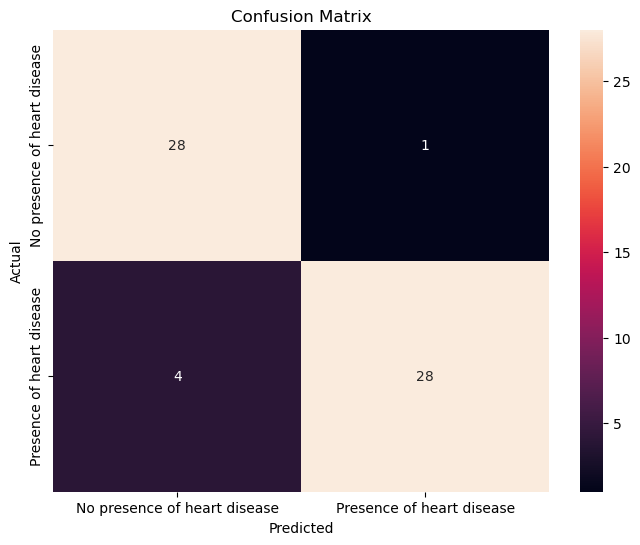

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".0f",
            xticklabels=['No presence of heart disease', 'Presence of heart disease'],
            yticklabels=['No presence of heart disease', 'Presence of heart disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show();
plt.savefig('confusion_matrix.png')

In [21]:
# Save the model, predictions, and performance metrics for future use
import joblib
joblib.dump(best_model, 'best_model.pkl')
np.savetxt("predictions.csv", predictions, delimiter=",")
with open("performance.txt", "w") as text_file:
    text_file.write(f"Accuracy: {accuracy_score(y_test, predictions)}\n")
    text_file.write(classification_report(y_test, predictions))